# 1. 데이터 불러오기

In [3]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [5]:
# 데이터 불러오기
sleep = pd.read_csv('Sleep_Efficiency.csv')

# 데이터 확인
sleep.head()

ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   

   Alcohol consumption Smoking status  Exercise frequency  
0                  0.0            Yes                 3.0  
1                  3.0            Yes                 3.0  
2                  0.0             No                 3.0  
3                  5.0            Yes                 1.0  
4                  3.0             No                 3.0

1. ID: 각 시험 과목에 대한 고유 식별자
2. **Age**: 피험자의 연령
3. **Gender**: 남성 또는 여성
4. **Bedtime**: 피험자가 매일 밤 잠자리에 드는 시간
5. **Wakeup time**: 피험자가 매일 아침 깨어나는 시간
6. **Sleep duration**: 피험자가 수면을 취한 총 시간
7. **Sleep efficiency**:  침대에서 보낸 시간 중 실제로 수면에 소요된       시간의 비율
8. **REM sleep percentage**: 렘수면에 소요된 총 수면 시간의 백분율
9. **Deep sleep percentage**: 깊은 숙면에 소요된 총 수면 시간의 백분율
10. **Light sleep percentage**: 가벼운 수면에 소요된 총 수면 시간의 백분율
11. **Awakenings**: 피험자가 밤에 깨어나는 횟수
12. **Caffeine consumption**: 취침 전 24시간 동안 섭취한 카페인의 양(mg)
13. **Alcohol consumption**: 취침 전 24시간 동안 섭취한 알코올의 양(온스)
14. **Smoking status**: 피험자의 흡연 여부
15. **Exercise frequency**: 피험자가 매주 운동하는 횟수험자가 매주 운동하는 횟수

target -> Sleep effciency

가설:

1. 젊을 수록 수면 효율이 높을 것이다.
2. 일찍 취침할 수록 수면 효율이 높을 것이다.
3. 카페인을 적게 마실수록 수면 효율이 높을 것이다.
4. 알코올을 적게 마실수록 수면 효율이 높을 것이다.
5. 비흡연자가 수면 효율이 높을 것이다.
6. 운동을 자주 할 수록 수면 높을 것이다.

# 2. 데이터 형태 확인

In [185]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

-  bedtime, wakeup time  -> datetime으로 변경
-  gender는 숫자로 바꿔줘야 겠음  
-  null 값이 있는 변수가 있음 -> Awakenings, Caffeine consumption,  Alcohol consumption ,Exercise frequency

In [187]:
sleep.describe()

ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18.000000                7.000000   
25%               20.000000              48.250000               15.000000   
50%               22.000000              58.000000               18.000000   
75%               25.000000              63.000000               32.500000   
max               30.000000              75.000000               63.000000   

       Awakenings  Caffeine consumption  Alcohol consumption  \
count  432.000000            427.000000           438.000000   
mean     1.641204             23.653396             1.173516   
std      1.356762             30.202785             1.621377   
min      0.000000              0.000000             0.000000   
25%      1.000000              0.000000             0.000000   
50%      1.000000             25.000000             0.000000   
75%      3.000000             50.000000             2.000000   
max      4.000000            200.000000             5.000000   

       Exercise frequency  
count          446.000000  
mean             1.791480  
std              1.428134  
min              0.000000  
25%              0.000000  
50%              2.000000  
75%              3.000000  
max              5.000000

- Alcohol consumption, Caffeine consumption 이게 좀 데이터가 한 쪽으로 치우쳐져 있을거 같음.

# 3. EDA

In [37]:
# 결측치 여부 확인
sleep.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [191]:
# o_columns = sleep.select_dtypes(include ='object')
# o_columns.columns
# Index(['Gender', 'Bedtime', 'Wakeup time', 'Smoking status'], dtype='object') 
# 범주형 변수 중 Bedtime 이랑  Wakeup time은 나중에 시계열로 바꾸고, 나머지 성별이랑 흡연여부는 이상치가 없을 거기에 패스

## 수치형 변수 탐색

In [193]:
# 이상치를 확인

def eda_check(data):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data, kde = True)
    plt.grid()

    plt.subplot(1,2,2)
    sns.boxplot(y= data)
    plt.grid()
    plt.tight_layout()
    plt.show()

In [194]:
o_columns = sleep.select_dtypes(exclude ='object')
o_columns.columns

Index(['ID', 'Age', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Exercise frequency'],
      dtype='object')

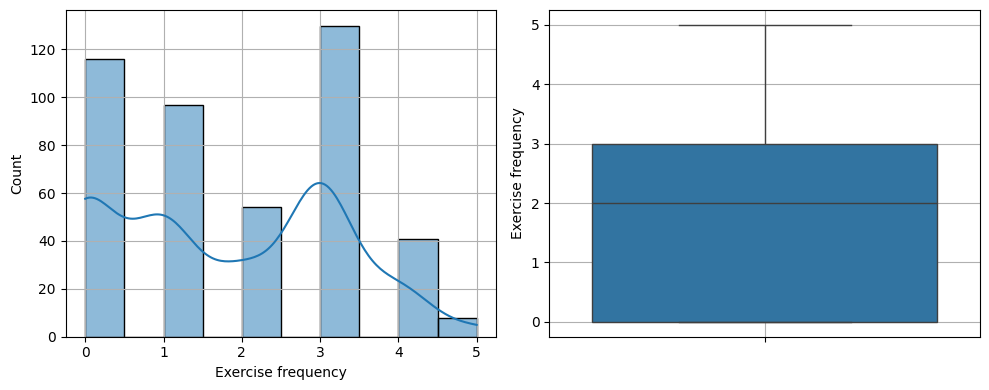

In [195]:
eda_check(sleep['Exercise frequency'])

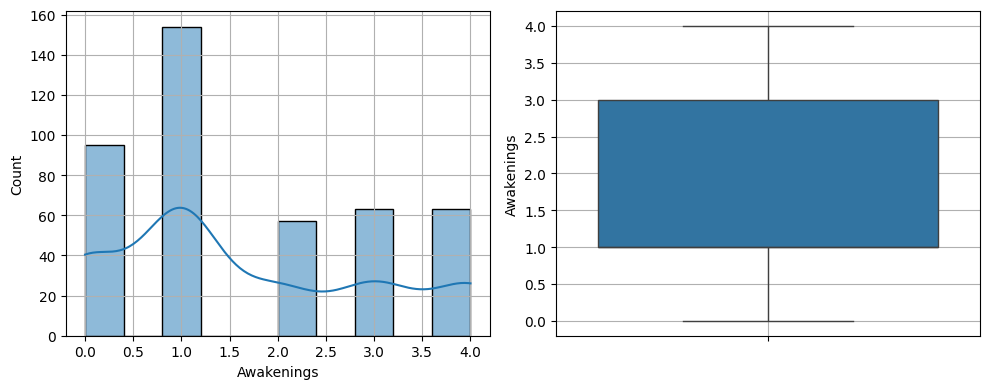

In [196]:
eda_check(sleep['Awakenings'])

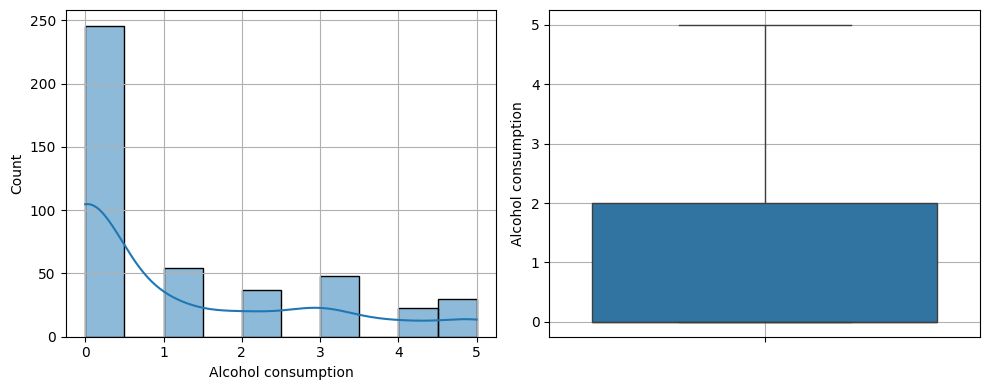

In [197]:
eda_check(sleep['Alcohol consumption'])        #취침 전 24시간 동안 섭취한 알코올의 양(온스)

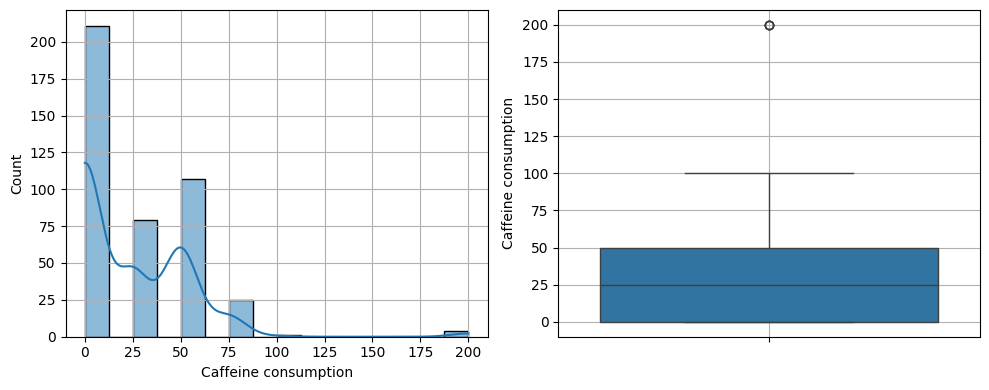

In [198]:
eda_check(sleep['Caffeine consumption'])    # 취침 전 24시간 동안 섭취한 카페인의 양(mg)

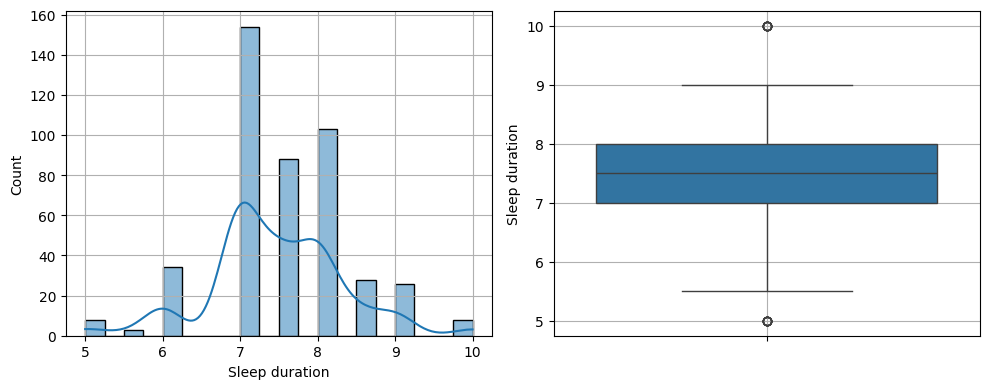

In [199]:
eda_check(sleep['Sleep duration'])  #피험자가 수면을 취한 총 시간

- 완벽한 정규분포 모습은 아니지만 거시적으로 보면 나름 고르게 분포하고 있다고 생각함. 

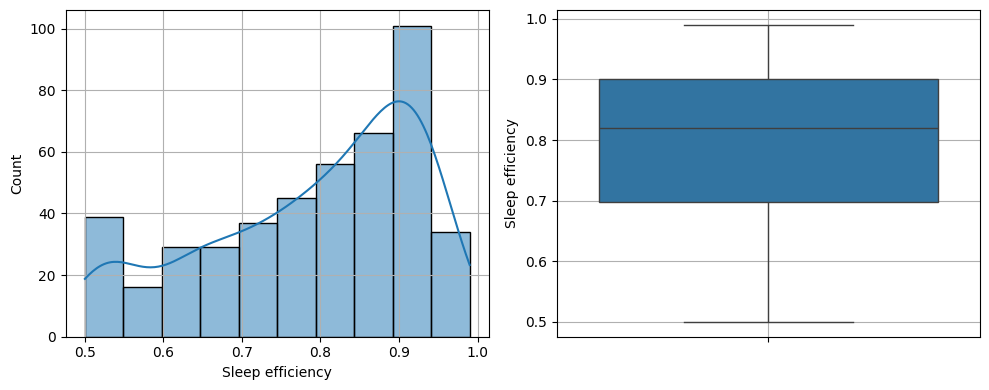

In [201]:
eda_check(sleep['Sleep efficiency'])    #침대에서 보낸 시간 중 실제로 수면에 소요된  시간의 비율

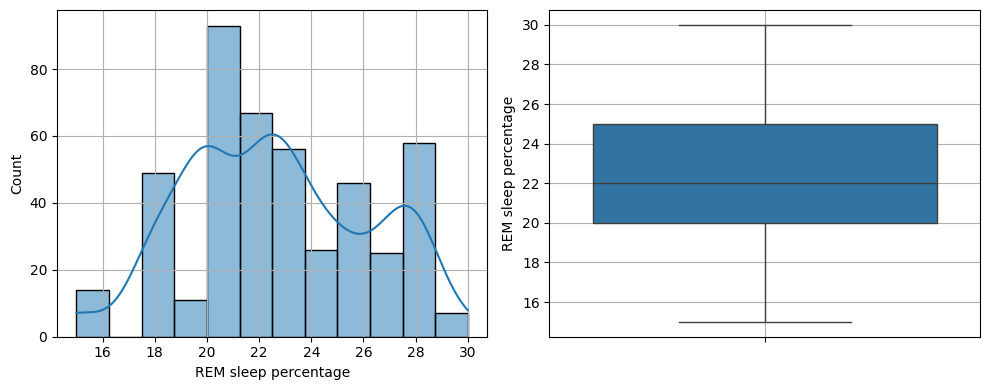

In [202]:
eda_check(sleep['REM sleep percentage'])   # 렘수면에 소요된 총 수면 시간의 백분율 (꿈 꾸는 시간)

In [203]:
sleep['REM sleep percentage'].unique()

array([18, 19, 20, 23, 27, 28, 24, 25, 15, 22, 26, 30, 21], dtype=int64)

17% 가 없단건..뭐 외부적 요인이 여기선 없을거 같음..그저 우연

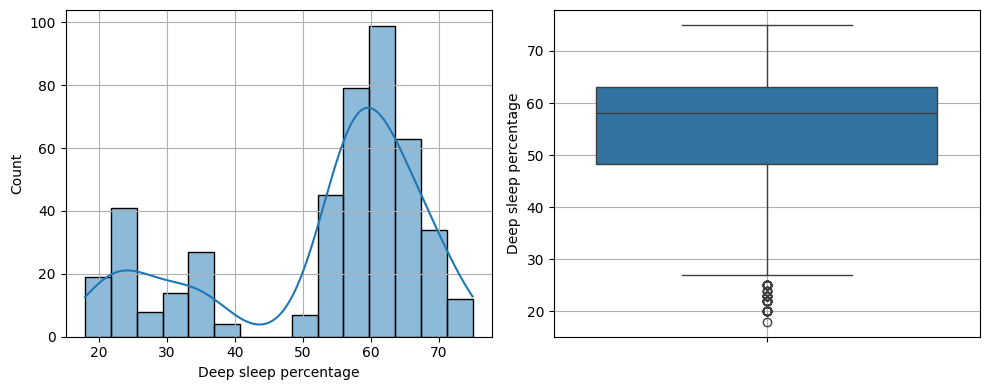

In [205]:
eda_check(sleep['Deep sleep percentage'])  # 깊은 숙면에 소요된 총 수면 시간의 백분율

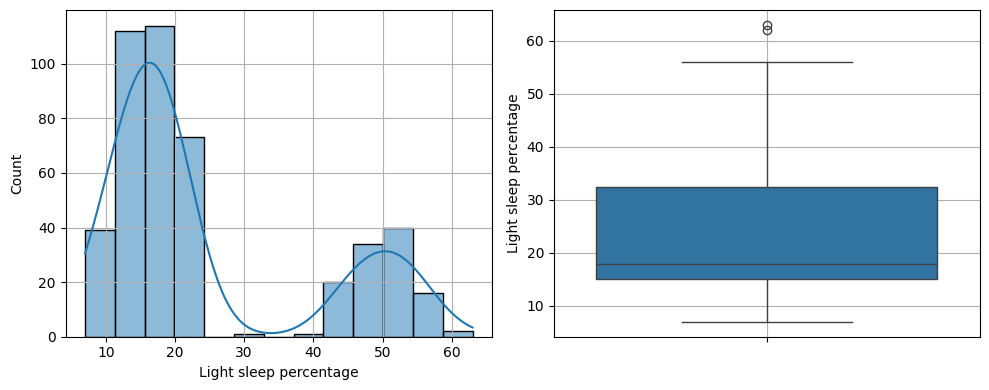

In [206]:
eda_check(sleep['Light sleep percentage'])    #가벼운 수면에 소요된 총 수면 시간의 백분율

수면은 렘- 비렘으로 나뉘고,
비렘은 총 4단계가 있다.  

1,2단계는 얕은 수면, 3,4단계는 깊은 수면, 그리고 비렘이 전체의 75~80을 차지한다고 함.  
그 중 얕은 수면이 좀 더 비율이 높고.    

여기서 1,2단계가 거진 50프로이상을 차지, 3,4단계가 25~ 30프로 차지.   
(참고) http://www.hegun.co.kr/index.php?page=board&file=view&atcl_seq=102284&mc=0504&table=md_board&board_cd=morestory&cpage=1

하고 싶은 말 :  
위의 깊은 수면, 얕은 수면, 렘 수면의 퍼센트를 생각해보면 얼추 수면단계 별 퍼센트값과 비슷함.  
그 외 값은 불면증이나 수면장애를 가진 비율이겠지.

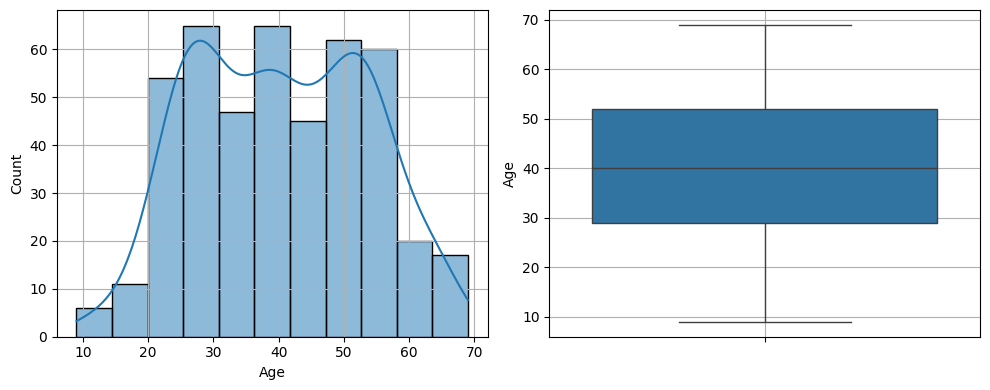

In [209]:
eda_check(sleep['Age'])

10대,20대 초반은 학교다닌다고 바빠서 못 한듯, 6070은 이런 실험 관심 없을거 같고

In [211]:
sleep['Age'].unique()

array([65, 69, 40, 57, 36, 27, 53, 41, 11, 50, 55, 30, 28, 32, 21, 43, 52,
       24, 29, 63, 35, 23, 47, 18, 26, 37, 46, 61, 38, 20, 58, 31, 34,  9,
       16, 54, 56, 25, 44, 66, 48, 45, 39, 51, 22, 15, 19, 33, 42, 68, 14,
       49, 62, 64, 59, 10, 13, 60, 67, 17, 12], dtype=int64)

- 이상치라고 지우기엔 수면장애와 연관된 부분이라 이상치라고 취급하기 어렵다 생각함.

## 범주형 변수 탐색

In [214]:
sleep['Gender'].value_counts(normalize = True)

Gender
Male      0.504425
Female    0.495575
Name: proportion, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

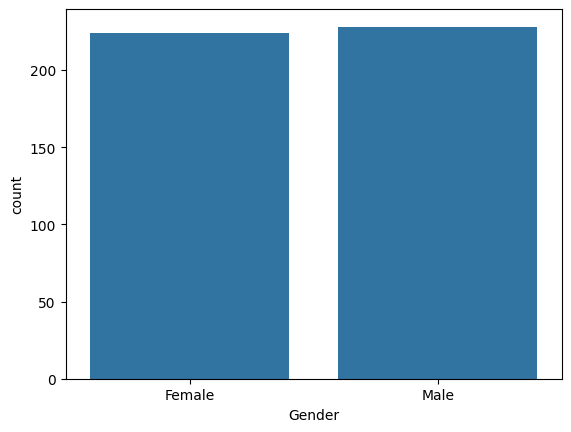

In [215]:
sns.countplot(x =sleep['Gender'])

# 4. 전처리

##  (수정사항) 취침. 일어나는 시간은 시간형태로 바꾸기만 함.

- Bedtime 과 Wakeup time 은 시계열로 바꾸기

In [7]:
sleep['Bedtime'] = pd.to_datetime(sleep['Bedtime']).dt.strftime('%H:%M:%S')
sleep['Wakeup time'] = pd.to_datetime(sleep['Wakeup time']).dt.strftime('%H:%M:%S')

## (수정사항) 결측치 채우는 거 수정

카페인 섭취
(참고  - https://coffee4m.com/%EC%8B%9D%ED%92%88%EB%B3%84-%EC%B9%B4%ED%8E%98%EC%9D%B8-%ED%95%A8%EB%9F%89-%EB%B9%84%EA%B5%90/)  
일반적인 식사에는 카페인이 포함되어 있지 않음을 알 수 있음.    

-> 그러나 일상적으로 커피를 마시는 경우가 많기에 이건 하위 25프로의 값으로 하겠음.--> 이 값이 0임.

- 알코올 섭취는 없는 값은 0으로 처리하겠음. -> 최빈값이자 중앙값이 0이여서.
- 깨어난 횟수는 최빈값으로 하겠음.  -> 한번도 안 일어나고 잤다고 하기엔 근거가 부족해서 다른 사람들의 다수와 비슷하다 가정하겠음.
- 운동여부는... 하위 25%가 0임.. 중앙값은 2. 평균은 1.7인데..
  (참고 - https://www.seoul.co.kr/news/economy/2013/07/30/20130730800101)  
  이 기사도 보면 성인 일주일 1.6회라고 함.  중앙값으로 채워넣겠음.

- 위 값들은 운동하지도, 커피를 마시지도, 술 안 먹는 거로 취급해서 0으로 채우겠음

In [9]:
sleep['Exercise frequency'] = sleep['Exercise frequency'].fillna(sleep['Exercise frequency'].median(0))
sleep['Caffeine consumption'] = sleep['Caffeine consumption'].fillna(0)
sleep['Alcohol consumption'] = sleep['Alcohol consumption'].fillna(0)
sleep['Awakenings'] = sleep['Awakenings'].fillna(sleep['Awakenings'].mode()[0])

- gender 와 Smoking status 의 경우 나중 분석을 위해 숫자로 값 변경하겠음

In [11]:
sleep['Gender'] = sleep['Gender'].map(dict(Male = 0,Female = 1))
sleep['Smoking status'] = sleep['Smoking status'].map(dict(No = 0,Yes = 1))

- id는 딱히 쓸모없으니 제거

In [13]:
sleep.drop(columns='ID' , inplace = True)

In [13]:
# 확인
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    int64  
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              452 non-null    float64
 10  Caffeine consumption    452 non-null    float64
 11  Alcohol consumption     452 non-null    float64
 12  Smoking status          452 non-null    int64  
 13  Exercise frequency      452 non-null    float64
dtypes: float64(6), int64(6), object(2)
memory 

In [49]:
# 확인 2
sleep.head()

Age  Gender   Bedtime Wakeup time  Sleep duration  Sleep efficiency  \
0   65       1  01:00:00    07:00:00             6.0              0.88   
1   69       0  02:00:00    09:00:00             7.0              0.66   
2   40       1  21:30:00    05:30:00             8.0              0.89   
3   40       1  02:30:00    08:30:00             6.0              0.51   
4   57       0  01:00:00    09:00:00             8.0              0.76   

   REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
0                    18                     70                      12   
1                    19                     28                      53   
2                    20                     70                      10   
3                    23                     25                      52   
4                    27                     55                      18   

   Awakenings  Caffeine consumption  Alcohol consumption  Smoking status  \
0         0.0                   0.0                  0.0               1   
1         3.0                   0.0                  3.0               1   
2         1.0                   0.0                  0.0               0   
3         3.0                  50.0                  5.0               1   
4         3.0                   0.0                  3.0               0   

   Exercise frequency  
0                 3.0  
1                 3.0  
2                 3.0  
3                 1.0  
4                 3.0

# 5. CDA

수치형 상관분석먼저 한번에 해보자    --> 이게 가능한 이유는 타겟값으로 잡은 것이 수치형이기에 가능

In [233]:
sleep.corr(numeric_only= True)['Sleep efficiency'].abs().sort_values(ascending = False)

Sleep efficiency          1.000000
Light sleep percentage    0.819204
Deep sleep percentage     0.787335
Awakenings                0.564979
Alcohol consumption       0.381249
Smoking status            0.290026
Exercise frequency        0.257688
Age                       0.098357
Caffeine consumption      0.065750
REM sleep percentage      0.062362
Sleep duration            0.027467
Gender                    0.010062
Name: Sleep efficiency, dtype: float64

생각보다 렘수면은 관계가 낮네.  
자는 시간이랑 일어나는 시간은 지금 시계열이라서 저리 관계가 떨어지는 것 같음. 이건 다르게 분석해야함. 

## 가설 확인

In [236]:
# 그래프 및 수치 확인

def cda_check(data1, data2):
    result = spst.pearsonr(data1,data2)
    print(f' 상관분석 = {result[0]} , p-value = {result[1]} \n')

    plt.figure(figsize = (3,3))
    scatter = plt.scatter(data1, data2)


    plt.show()

### 1. 젊을 수록 수면 효율이 높을 것이다.  --> 유효하다

 상관분석 = 0.09835669021700894 , p-value = 0.03658434926283932 



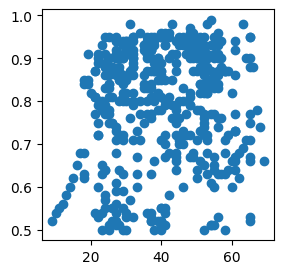

In [238]:
cda_check(sleep['Age'],sleep['Sleep efficiency'])

상관분석을 하자면 두 변수간의 관계는 약하나 p-value를 보면 가설이 유효하단 것을 알 수 있음

#### 추가 분석

##### 1) 연령과 성별이 수면효율과 관계 있지 않을까

In [242]:
female_sleep = sleep.loc[sleep['Gender'] == 1]
male_sleep = sleep.loc[sleep['Gender']  == 0 ]

 상관분석 = 0.09325857612591637 , p-value = 0.16422819682373102 



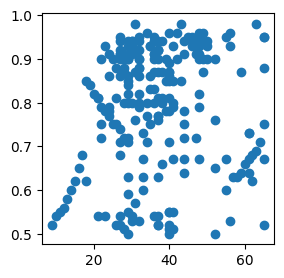

In [243]:
cda_check(female_sleep['Age'],female_sleep['Sleep efficiency'])

 상관분석 = 0.10535411904069644 , p-value = 0.11262889574718819 



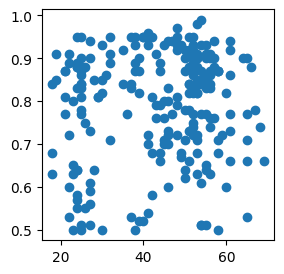

In [244]:
cda_check(male_sleep['Age'],male_sleep['Sleep efficiency'])

성별에 따른 수면 효율성은 유의미하지 않다. 

##### 2) 오로지 연령대만 보고 수면효율을 비교한다면

In [15]:
temp = sleep.copy()

In [17]:
temp['age_group'] = pd.cut(temp['Age'] , bins = [0,10,20,30,40,50,60,70], labels = ['10대 미만','10대','20대','30대','40대','50대','60대'])

In [ ]:
plt.figure(figsize = (3,3))
sns.barplot(x='age_group' , y = 'Sleep efficiency', data = temp)
plt.grid()
plt.show()

print()
temp_0 = temp.loc[temp['age_group'] == '10대 미만', 'Sleep efficiency']
temp_1 = temp.loc[temp['age_group'] == '10대', 'Sleep efficiency']
temp_2 = temp.loc[temp['age_group'] == '20대', 'Sleep efficiency']
temp_3 = temp.loc[temp['age_group'] == '30대', 'Sleep efficiency']
temp_4 = temp.loc[temp['age_group'] == '40대', 'Sleep efficiency']
temp_5 = temp.loc[temp['age_group'] == '50대', 'Sleep efficiency']
temp_6 = temp.loc[temp['age_group'] == '60대', 'Sleep efficiency']

spst.f_oneway(temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6)

집단간 변동이 있고, p값이 작으므로 이건 유의미한 관계가 있다.

유의미한 값이기에 변수를 추가한다.

In [19]:
sleep['age_group'] = temp['age_group']

##### 3) 성별과 수면효율성은 관계가 있으려나

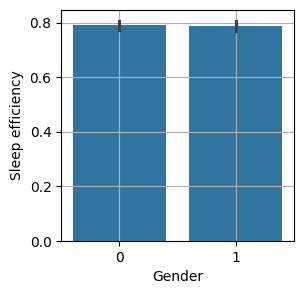

TtestResult(statistic=0.21345098376080054, pvalue=0.8310718884581805, df=450.0)

In [254]:
# 범주형이였던  값이였기에 범주로 분석

plt.figure(figsize = (3,3))
sns.barplot(x='Gender' , y = 'Sleep efficiency', data = temp)
plt.grid()
plt.show()

print()

temp_0 = temp.loc[sleep['Gender'] == 0, 'Sleep efficiency']
temp_1 = temp.loc[sleep['Gender'] == 1, 'Sleep efficiency']
spst.ttest_ind(temp_0,temp_1)

성별과 수면효율은 관계없다

### ( 수정 ) 2. 일찍 취침할 수록 수면 효율이 높을 것이다.  --> 유의미하다


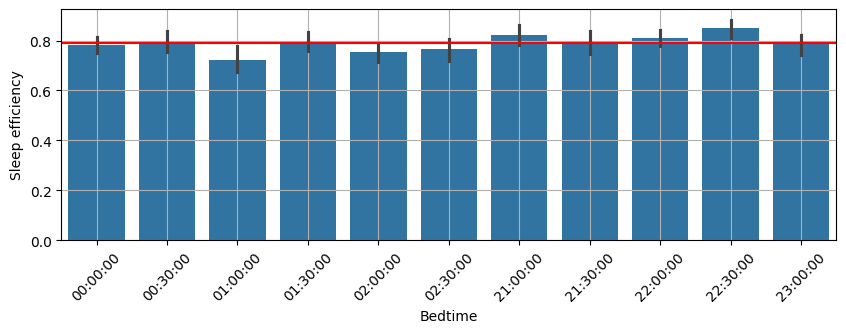

In [257]:
# 'Bedtime' 열을 기준으로 데이터프레임 정렬
sorted_sleep = sleep.sort_values(by='Bedtime')

plt.figure(figsize=(10, 3))
sns.barplot(x='Bedtime', y='Sleep efficiency', data=sorted_sleep)
plt.axhline(sorted_sleep['Sleep efficiency'].mean(), color = 'red')
plt.xticks(rotation=45)
plt.grid()
plt.show()


- 그래프만보면 신뢰구간이 많이 겹쳐있음. --> 그룹간 평균이 가깝게 있고, 명확한 차이가 없음을 의미

In [299]:
b_time = sorted_sleep['Bedtime'].unique()
spst.f_oneway(*[sorted_sleep.loc[sorted_sleep['Bedtime'] == c, ['Sleep efficiency']] for c in b_time])


F_onewayResult(statistic=array([2.15586323]), pvalue=array([0.01949396]))

- 통계값을 보면 가설을 지지한다고 함.

### ( 수정 ) 3. 카페인을 적게 마실수록 수면 효율이 높을 것이다.  --> 유의미하지 않다


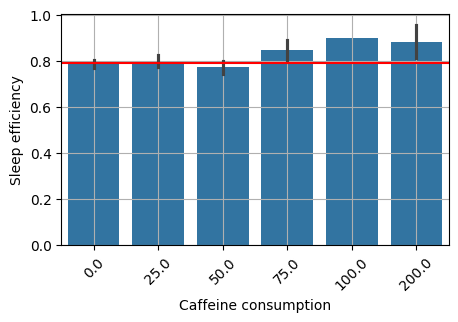

In [303]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Caffeine consumption', y='Sleep efficiency', data=sleep)
plt.axhline(sleep['Sleep efficiency'].mean(), color = 'red')
plt.xticks(rotation=45)
plt.grid()
plt.show()

그래프만 보면 신뢰구간들이.. 겹치는게 꽤 있음..

In [306]:
caffeine = sleep['Caffeine consumption'].unique()
spst.f_oneway(*[sleep.loc[sleep['Caffeine consumption'] == c, ['Sleep efficiency']] for c in caffeine])

F_onewayResult(statistic=array([1.88986099]), pvalue=array([0.09476554]))

- 귀무가설 지지가 0.05보다 크고, 통계량 또한 유의미하지 않다고 나왔다

### ( 수정 ) 4. 알코올을 적게 마실수록 수면 효율이 높을 것이다.  -> 유효하다


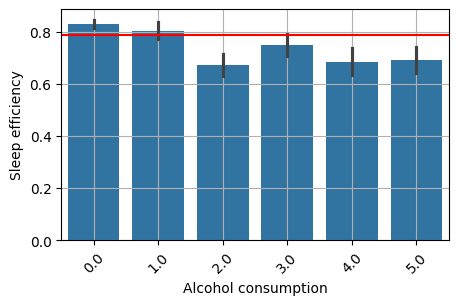

In [309]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Alcohol consumption', y='Sleep efficiency', data=sleep)
plt.axhline(sleep['Sleep efficiency'].mean(), color = 'red')
plt.xticks(rotation=45)
plt.grid()
plt.show()

각 범주를 2개씩 잡아 보면 관련이 없는거 같은데.. 전체적으로 보면 또 관련있어보임.

In [311]:
alcohol = sleep['Alcohol consumption'].unique()
spst.f_oneway(*[sleep.loc[sleep['Alcohol consumption'] == a, ['Sleep efficiency']] for a in alcohol])

F_onewayResult(statistic=array([20.75743486]), pvalue=array([1.16707304e-18]))

- 통계랑 p값이 가설을 많이 지지하고 있음

### 5. 비흡연자가 수면 효율이 높을 것이다.  -> 유의미 하다

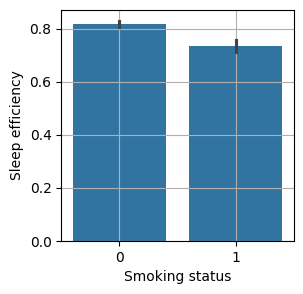

TtestResult(statistic=6.4286893157053955, pvalue=3.288310567775705e-10, df=450.0)

In [126]:
# 범주형이였던  값이였기에 범주로 분석

plt.figure(figsize = (3,3))
sns.barplot(x='Smoking status' , y = 'Sleep efficiency', data = temp)
plt.grid()
plt.show()

print()

temp_0 = temp.loc[sleep['Smoking status'] == 0, 'Sleep efficiency']
temp_1 = temp.loc[sleep['Smoking status'] == 1, 'Sleep efficiency']
spst.ttest_ind(temp_0,temp_1)

변수 평균간의 차이가 크고, 귀무가설 지지도가 작은 것을 보아 이 가설은 유의미하다 

### ( 수정 ) 6. 운동을 자주 할 수록 수면 높을 것이다.  --> 유의미하다

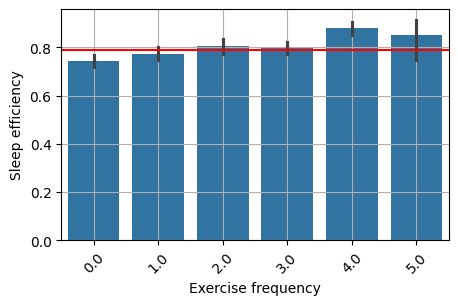

In [318]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Exercise frequency', y='Sleep efficiency', data=sleep)
plt.axhline(sleep['Sleep efficiency'].mean(), color = 'red')
plt.xticks(rotation=45)
plt.grid()
plt.show()

그래프 전체적으로 보면 관계가 있는거 같다.

In [326]:
exercise = sleep['Exercise frequency'].unique()
spst.f_oneway(*[sleep.loc[sleep['Exercise frequency'] == e, ['Sleep efficiency']] for e in exercise])

F_onewayResult(statistic=array([7.88919206]), pvalue=array([3.90800591e-07]))

유의미한 관계임을 알 수 있다

### ( 수정 ) 7. 수면 총 시간과 수면 효율간의 관계가 있을 것이다. --> 관계없다

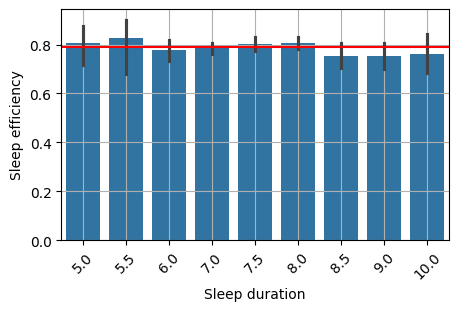

In [320]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Sleep duration', y='Sleep efficiency', data=sleep)
plt.axhline(sleep['Sleep efficiency'].mean(), color = 'red')
plt.xticks(rotation=45)
plt.grid()
plt.show()

 신뢰구간들이 다 겹침 -> 연관없다

In [328]:
all_time = sleep['Sleep duration'].unique()
spst.f_oneway(*[sleep.loc[sleep['Sleep duration'] == a, ['Sleep efficiency']] for a in all_time])

F_onewayResult(statistic=array([0.94851397]), pvalue=array([0.4760824]))

- 확인사살함

##  변수들간의 관계

### 1) 나이와 나이그룹   --> 나이는 지우기로 함

In [21]:
sleep.corr(numeric_only = True)['Age'].abs().sort_values(ascending = False)

Age                       1.000000
Gender                    0.244468
Caffeine consumption      0.148925
Sleep efficiency          0.098357
Exercise frequency        0.070775
Sleep duration            0.062462
Alcohol consumption       0.052238
REM sleep percentage      0.042091
Light sleep percentage    0.031905
Smoking status            0.031237
Deep sleep percentage     0.021730
Awakenings                0.016677
Name: Age, dtype: float64

솔직히 상관계수만 봤을 땐 딱히 관계 없어보임

### 2) 성별과 다른 변수  --> 지우기로 함

In [23]:
sleep.corr(numeric_only = True)['Gender'].abs().sort_values(ascending = False)

Gender                    1.000000
Age                       0.244468
Caffeine consumption      0.236669
Exercise frequency        0.230770
REM sleep percentage      0.161102
Smoking status            0.143020
Deep sleep percentage     0.075939
Awakenings                0.074029
Alcohol consumption       0.051557
Sleep duration            0.044376
Light sleep percentage    0.040534
Sleep efficiency          0.010062
Name: Gender, dtype: float64

모든 변수들과 약한 관계성을 가졌기에 이 변수는 지워도 될 듯 함

### 3) 카페인과 다른 변수  --> 일단 냅두기로 함

In [339]:
sleep.corr(numeric_only = True)['Caffeine consumption'].abs().sort_values(ascending = False)

Caffeine consumption      1.000000
Gender                    0.236669
Age                       0.148925
Alcohol consumption       0.120522
Awakenings                0.109053
Sleep efficiency          0.065750
REM sleep percentage      0.058738
Exercise frequency        0.054813
Light sleep percentage    0.019528
Sleep duration            0.009956
Deep sleep percentage     0.005873
Smoking status            0.005300
Name: Caffeine consumption, dtype: float64

위 수치들로 보면 관계가 거의 없고, 있다한들 우연으로 나온 것이라 하나   
수면과 카페인은 관련이 있단 도메인이 있기에, 변수가 그리 많은 것도 아녀서 일단 냅두기로 함.   

(참고) https://www.sleep.or.kr/html/?pmode=BBBS0019600010&smode=view&seq=920

### 4) 총 수면시간과 다른 변수  --> 일단 냅두기

In [341]:
sleep.corr(numeric_only = True)['Sleep duration'].abs().sort_values(ascending = False)

Sleep duration            1.000000
Exercise frequency        0.067064
Age                       0.062462
Gender                    0.044376
Alcohol consumption       0.044325
Light sleep percentage    0.041804
Deep sleep percentage     0.037304
Sleep efficiency          0.027467
REM sleep percentage      0.015940
Caffeine consumption      0.009956
Awakenings                0.004939
Smoking status            0.004211
Name: Sleep duration, dtype: float64

수치로 보면 수면 효율과 총 수면시간은 관련이 적고, 다른 변수들과도 관련이 적다.  
그나마 어느정도 영향 받는 변수는 깨어나는 시간변수 (wakeup time).  

그래도 적정 수면시간이란 것으로 일정시간 자 주는 것이 수면에, 건강에 좋단 도메인이 있으므로 일단 냅두기  
(참고) https://www.sleepmed.or.kr/content/info/sleeptime.html

In [21]:
# 최종 데이터 확인
sleep.drop(columns=['Age','Gender'],inplace= True)
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Bedtime                 452 non-null    object  
 1   Wakeup time             452 non-null    object  
 2   Sleep duration          452 non-null    float64 
 3   Sleep efficiency        452 non-null    float64 
 4   REM sleep percentage    452 non-null    int64   
 5   Deep sleep percentage   452 non-null    int64   
 6   Light sleep percentage  452 non-null    int64   
 7   Awakenings              452 non-null    float64 
 8   Caffeine consumption    452 non-null    float64 
 9   Alcohol consumption     452 non-null    float64 
 10  Smoking status          452 non-null    int64   
 11  Exercise frequency      452 non-null    float64 
 12  age_group               452 non-null    category
dtypes: category(1), float64(6), int64(4), object(2)
memory usage: 43.3+ KB


# 6. 데이터 분석

## 1. 데이터 분리

In [23]:
# 문자형을 숫자로 바꿔주기
sleep['Bedtime'] = pd.to_datetime(sleep['Bedtime'])
sleep['Wakeup time'] = pd.to_datetime(sleep['Wakeup time'])
sleep['Bedtime'] = sleep['Bedtime'].dt.hour + sleep['Bedtime'].dt.minute/60
sleep['Wakeup time'] = sleep['Wakeup time'].dt.hour +sleep['Wakeup time'].dt.minute/60

C:\Users\User\AppData\Local\Temp\ipykernel_20000\2428970601.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep['Bedtime'] = pd.to_datetime(sleep['Bedtime'])
C:\Users\User\AppData\Local\Temp\ipykernel_20000\2428970601.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep['Wakeup time'] = pd.to_datetime(sleep['Wakeup time'])


In [25]:
# age_group 값 수정
age_mapping = {
    '10대 미만': 0,
    '10대': 1,
    '20대': 2,
    '30대': 3,
    '40대': 4,
    '50대': 5,
    '60대': 6
}

sleep['age_group'] = sleep['age_group'].map(age_mapping)

In [27]:
data = sleep.drop(columns='Sleep efficiency')
target = sleep['Sleep efficiency']

# 라이브러리 불러오기
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(data, target, test_size = 0.25)

## 2. 결정트리로 분석

In [35]:
# 라이브러리 불러오기
from sklearn.tree import DecisionTreeRegressor

# 모델 생성
tree = DecisionTreeRegressor(max_depth=7) 

# 교차검증으로 성능 확인
from sklearn.model_selection import cross_validate

cv_score = cross_validate(tree , x_train, y_train, cv = 10,return_train_score = True)  # 10개로 나눠봤음

In [178]:
cv_score

{'fit_time': array([0.00552249, 0.00545669, 0.00578594, 0.00701141, 0.0077157 ,
        0.00713325, 0.        , 0.        , 0.01569939, 0.        ]),
 'score_time': array([0.00337744, 0.00431705, 0.00381184, 0.00162554, 0.        ,
        0.00659561, 0.0081501 , 0.        , 0.        , 0.01554823]),
 'test_score': array([0.76442757, 0.65717926, 0.85645396, 0.80757179, 0.76276074,
        0.86105334, 0.86840412, 0.89736132, 0.8756574 , 0.77476768]),
 'train_score': array([0.95903499, 0.97337923, 0.95353073, 0.95498876, 0.96617089,
        0.95574762, 0.95679318, 0.9598158 , 0.95329181, 0.95699448])}

In [180]:
np.mean(cv_score['train_score']) ,np.mean(cv_score['test_score'])

(0.9589747481578698, 0.8125637190483449)

- 과적합이 일어났음

In [ ]:
# cross_validtate의 경우 성능 예측 평가를 하는것이지 그것에 대한 최적의 파라미터 모델이라던가 그런건 없다.
# 그저 이 데이터의 경우 평균 어느정도 예측을 하는가를 파악하는 용도

In [133]:
# 성능 평가
tree.fit(x_train,y_train)
pred = tree.predict(x_test)

print('과적합 유무 확인')
print(f'훈련데이터 : {tree.score(x_train , y_train)}')
print(f'학습데이터 : {tree.score(x_test , y_test)}')

print("=="*15)
from sklearn.metrics import *
print("학습데이터 종합적 평가")
print(f'rmse : {root_mean_squared_error( y_test, pred)}')
print(f'mae : {mean_absolute_error( y_test, pred)}')
print(f'mape : {mean_absolute_percentage_error( y_test, pred)}')

과적합 유무 확인
훈련데이터 : 0.9621891033158096
학습데이터 : 0.7743626797249241
학습데이터 종합적 평가
rmse : 0.06280594775978789
mae : 0.044383204172270325
mape : 0.060555755911730846


- 과적합이 나타난 것을 볼 수 있다.
- rmse를 봐선 값들 사이 이상치는 그리 없는 것 같고, mape도 보면 오차비율이 꽤 작음

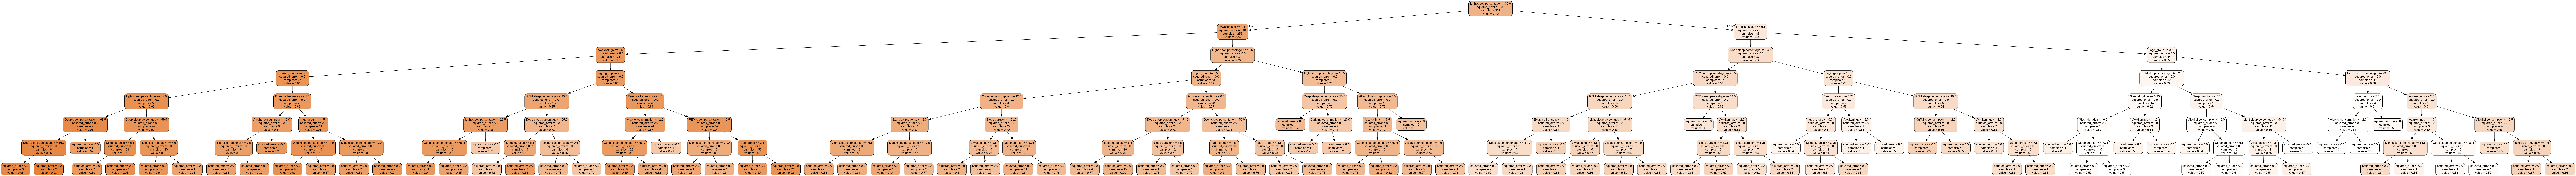

In [156]:
# 시각화 모듈 불러오기
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(tree,                              # 모델 이름
                out_file='tree.dot',                   # 파일 이름
                rounded=True,                          # 둥근 테두리
                precision=2,                           # 불순도 소숫점 자리수
                filled=True,                            # 박스 내부 채우기
                feature_names=x_train.columns)           

# 파일 변환
!dot tree.dot -Tpng -otree.png -Gdpi=150

# 이미지 파일 표시
Image(filename='tree.png')

깊이가 3일때
과적합 유무 확인
훈련데이터 : 0.8874220615194387
학습데이터 : 0.7914123845227771
학습데이터 종합적 평가
rmse : 0.06038645940292881
mae : 0.04687192404449043
mape : 0.06316851226422089
깊이가 4일때
과적합 유무 확인
훈련데이터 : 0.9055191042787981
학습데이터 : 0.7799612256884847
학습데이터 종합적 평가
rmse : 0.06202187845099416
mae : 0.04658387245757416
mape : 0.06262480452725679
깊이가 5일때
과적합 유무 확인
훈련데이터 : 0.9240345915852043
학습데이터 : 0.7613962809344684
학습데이터 종합적 평가
rmse : 0.06458533421506367
mae : 0.04828567892284706
mape : 0.06487694137041904
깊이가 6일때
과적합 유무 확인
훈련데이터 : 0.9463608008174905
학습데이터 : 0.768578827638854
학습데이터 종합적 평가
rmse : 0.06360581938242825
mae : 0.047164960053952786
mape : 0.06388543222962337
깊이가 7일때
과적합 유무 확인
훈련데이터 : 0.9621891033158096
학습데이터 : 0.7736803645411945
학습데이터 종합적 평가
rmse : 0.06290083699173536
mae : 0.04446874989498419
mape : 0.06074018529375428


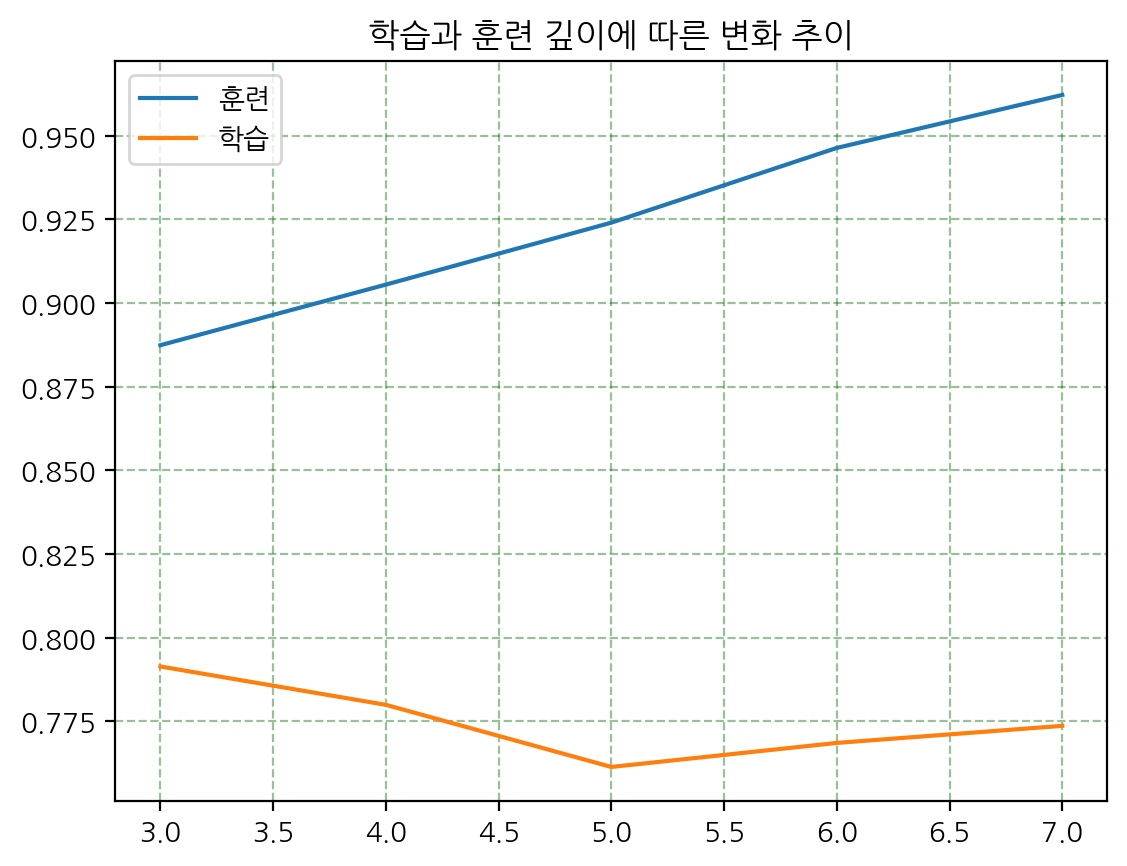

In [189]:
# 한번 깊이에 따른 값을 확인해보자
train_score = []
test_score=[]

for i in range(3,8):
    # 모델 생성
    tree = DecisionTreeRegressor(max_depth=i)


    # 성능 평가
    tree.fit(x_train,y_train)
    pred = tree.predict(x_test)
    print(f"깊이가 {i}일때")
    print('과적합 유무 확인')
    print(f'훈련데이터 : {tree.score(x_train , y_train)}')
    print(f'학습데이터 : {tree.score(x_test , y_test)}')
    train_score.append( tree.score(x_train , y_train) )
    test_score.append( tree.score(x_test , y_test) )
    
    print("=="*15)
    from sklearn.metrics import *
    print("학습데이터 종합적 평가")
    print(f'rmse : {root_mean_squared_error( y_test, pred)}')
    print(f'mae : {mean_absolute_error( y_test, pred)}')
    print(f'mape : {mean_absolute_percentage_error( y_test, pred)}')

    print("=="*15)
    print("=="*15)

plt.title('학습과 훈련 깊이에 따른 변화 추이')
plt.plot(list(range(3,8)), train_score , label = '훈련')
plt.plot(list(range(3,8)), test_score , label = '학습')
plt.grid(color ='darkgreen', linestyle ='--', alpha =0.4)
plt.legend()
plt.show()

다~~~ 과적합임


## 3. 랜덤 포레스트로 분석

In [166]:
# 기본 설정값만으로 한번 분석해보기
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(oob_score = True, n_jobs = -1)   # oob_score 를 True로 하면 부트샘플링에서 쓰이지 않는 데이터로 검증을 할 수 있음

# 교차검증으로 우선 데이터 예측해보기
rand_cs = cross_validate(random, x_train, y_train,return_train_score = True)
np.mean(rand_cs['train_score']) ,np.mean(rand_cs['test_score'])

(0.980750769382263, 0.8687937621665652)

- 우선 학습데이터만으로만 봐도 과적합이 일어났단걸 볼 수 있음.

과적합 유무 확인
훈련데이터 : 0.9813897486030407
학습데이터 : 0.806475342987971
학습데이터 종합적 평가
rmse : 0.05816523139885977
mae : 0.04385230931310574
mape : 0.05905751995565418


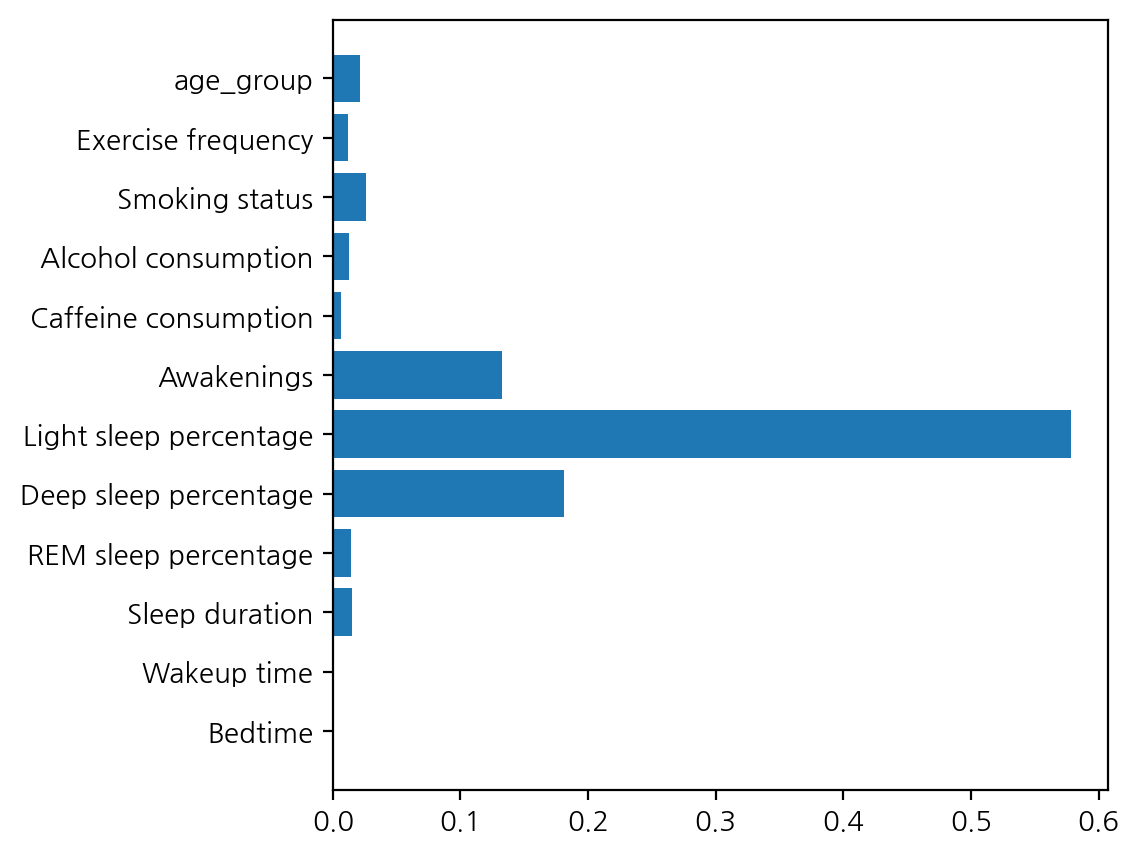

In [173]:
# 성능 평가
random.fit(x_train,y_train)
pred = random.predict(x_test)

print('과적합 유무 확인')
print(f'훈련데이터 : {random.score(x_train , y_train)}')
print(f'학습데이터 : {random.score(x_test , y_test)}')

print("=="*15)
from sklearn.metrics import *
print("학습데이터 종합적 평가")
print(f'rmse : {root_mean_squared_error( y_test, pred)}')
print(f'mae : {mean_absolute_error( y_test, pred)}')
print(f'mape : {mean_absolute_percentage_error( y_test, pred)}')

# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(data), width=random.feature_importances_)
plt.show()

깊이가 5일때
과적합 유무 확인
훈련데이터 : 0.9304837542110076
학습데이터 : 0.8044093066104779
깊이가 6일때
과적합 유무 확인
훈련데이터 : 0.9465518478461564
학습데이터 : 0.8069237668082057
깊이가 7일때
과적합 유무 확인
훈련데이터 : 0.9597321922205961
학습데이터 : 0.8008892044057563
깊이가 8일때
과적합 유무 확인
훈련데이터 : 0.9662593973578865
학습데이터 : 0.809292925935448
깊이가 9일때
과적합 유무 확인
훈련데이터 : 0.9728032555211756
학습데이터 : 0.8125671659163028
깊이가 10일때
과적합 유무 확인
훈련데이터 : 0.9770129311473956
학습데이터 : 0.8123414381611668
깊이가 11일때
과적합 유무 확인
훈련데이터 : 0.9790987591987126
학습데이터 : 0.800802954565381
깊이가 12일때
과적합 유무 확인
훈련데이터 : 0.9810631775322712
학습데이터 : 0.8055429745743303
깊이가 13일때
과적합 유무 확인
훈련데이터 : 0.9806023560925061
학습데이터 : 0.8060478329386838
깊이가 14일때
과적합 유무 확인
훈련데이터 : 0.9811582567774528
학습데이터 : 0.8114748624290301
깊이가 15일때
과적합 유무 확인
훈련데이터 : 0.9812856479675243
학습데이터 : 0.8083028577959885
깊이가 16일때
과적합 유무 확인
훈련데이터 : 0.9822457830631068
학습데이터 : 0.8096244533445316
깊이가 17일때
과적합 유무 확인
훈련데이터 : 0.9818119188070958
학습데이터 : 0.8115684599232665
깊이가 18일때
과적합 유무 확인
훈련데이터 : 0.9813563638114741
학습데이터 : 0.80

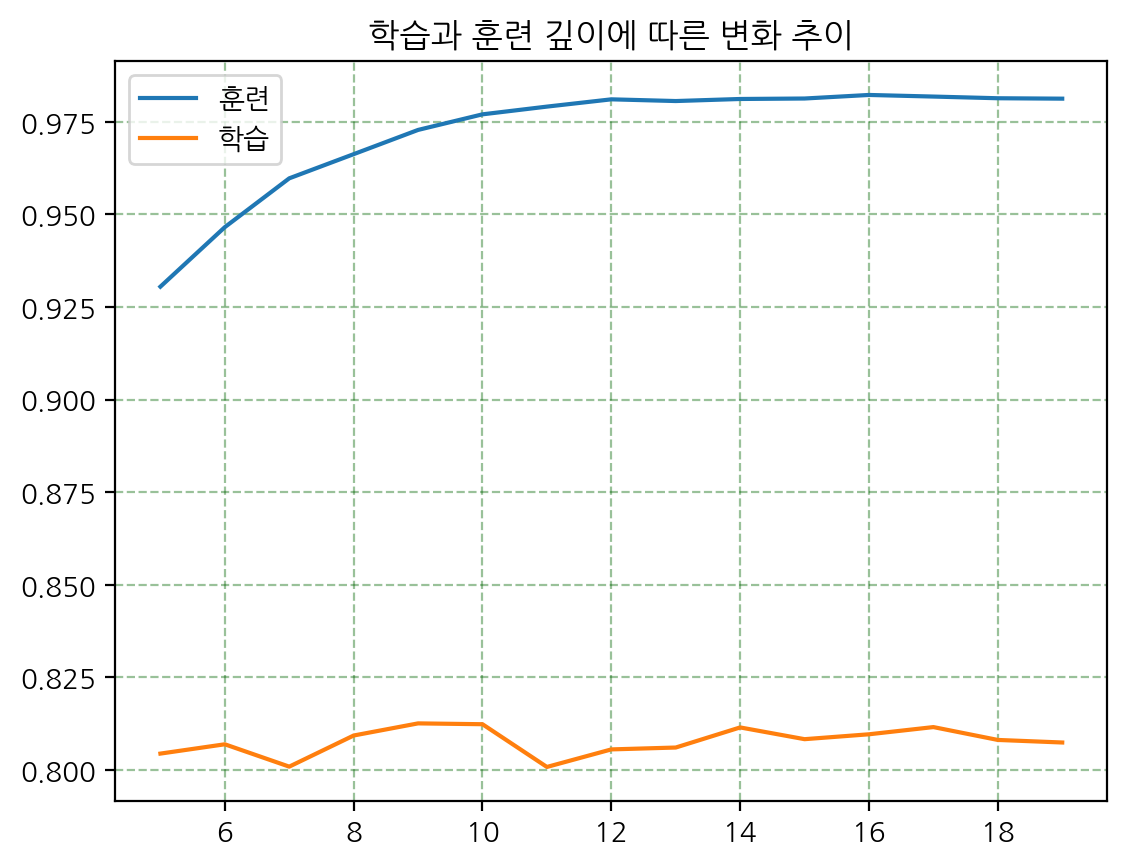

In [223]:
# 한번 깊이에 따른 값을 확인해보자
train_score = []
test_score=[]

for i in range(5,20):
    # 모델 생성
    random = RandomForestRegressor(oob_score = True, n_jobs = -1, max_depth= i) 


    # 성능 평가
    random.fit(x_train,y_train)
    pred = random.predict(x_test)
    print(f"깊이가 {i}일때")
    print('과적합 유무 확인')
    print(f'훈련데이터 : {random.score(x_train , y_train)}')
    print(f'학습데이터 : {random.score(x_test , y_test)}')
    train_score.append( random.score(x_train , y_train) )
    test_score.append( random.score(x_test , y_test) )


plt.title('학습과 훈련 깊이에 따른 변화 추이')
plt.plot(list(range(5,20)), train_score , label = '훈련')
plt.plot(list(range(5,20)), test_score , label = '학습')
plt.grid(color ='darkgreen', linestyle ='--', alpha =0.4)
plt.legend()
plt.show()

- 훈련은 성능이 어느정도 향상되었다 멈춘 것을 볼 수 있고, 학습의 경우 0.8 언저리에 있다. 과적합 상태임

## 4. xg 부스터로 해보기

In [203]:
# 카테고리형인 age_group의 경우 숫자로 변경해줘야함
x_train['age_group'] = x_train['age_group'].astype('int')
x_test['age_group'] = x_test['age_group'].astype('int')

In [205]:
# 기본 설정값만으로 한번 분석해보기
from xgboost import XGBRegressor
xgb = XGBRegressor( n_jobs = -1)   

# 교차검증으로 우선 데이터 예측해보기
xgb_cs = cross_validate(xgb, x_train, y_train,return_train_score = True)
np.mean(xgb_cs['train_score']) ,np.mean(xgb_cs['test_score'])

(0.9976752579230832, 0.8443459922767639)

- 랜덤 포레스트 보다 성능이 좋아졌으나 과적합

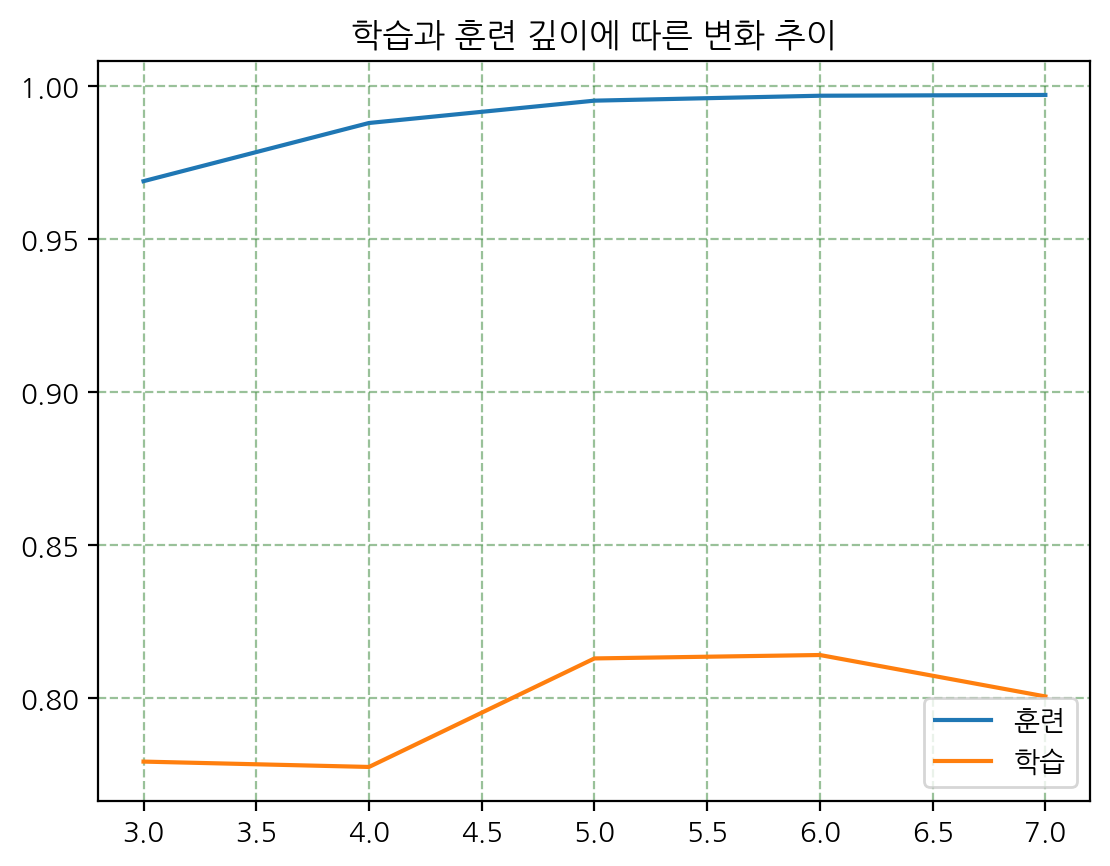

In [208]:
from xgboost import XGBRegressor
train_score = []
test_score=[]

for i in range(3,8):
    # 모델 생성
    xgb = XGBRegressor( n_jobs = -1, max_depth= i  )   # n_estimators 


    # 성능 평가
    xgb.fit(x_train,y_train)
    pred = xgb.predict(x_test)
    train_score.append( xgb.score(x_train , y_train) )
    test_score.append( xgb.score(x_test , y_test) )


plt.title('학습과 훈련 깊이에 따른 변화 추이')
plt.plot(list(range(3,8)), train_score , label = '훈련')
plt.plot(list(range(3,8)), test_score , label = '학습')
plt.grid(color ='darkgreen', linestyle ='--', alpha =0.4)
plt.legend()
plt.show()

- 훈련 정확도는 거의 1.0에 가까운 높은 성능을 보이고 있지만, 학습 정확도는 상대적으로 낮고 일정하게 유지 -> 과대적합

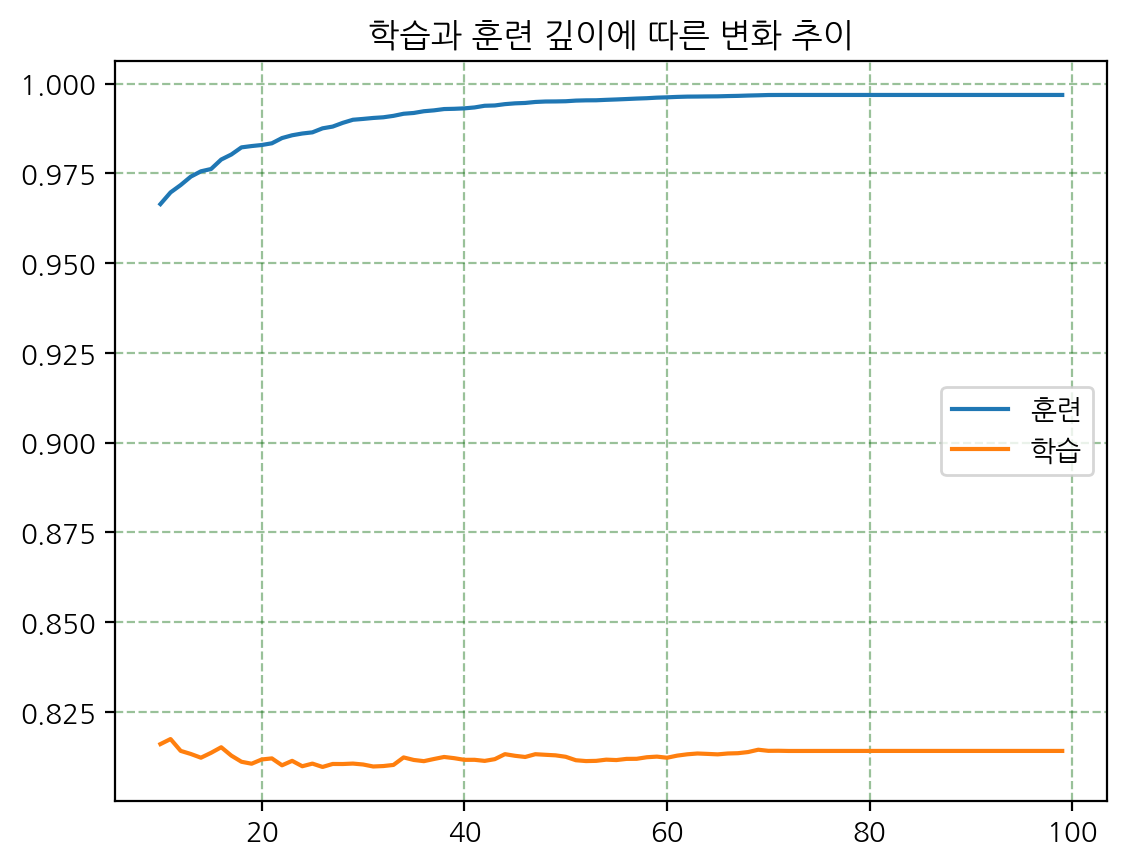

In [210]:
train_score = []
test_score=[]

for i in range(10,100):
    # 모델 생성
    xgb = XGBRegressor( n_jobs = -1,  n_estimators = i  )   


    # 성능 평가
    xgb.fit(x_train,y_train)
    pred = xgb.predict(x_test)
    train_score.append( xgb.score(x_train , y_train) )
    test_score.append( xgb.score(x_test , y_test) )


plt.title('학습과 훈련 깊이에 따른 변화 추이')
plt.plot(list(range(10,100)), train_score , label = '훈련')
plt.plot(list(range(10,100)), test_score , label = '학습')
plt.grid(color ='darkgreen', linestyle ='--', alpha =0.4)
plt.legend()
plt.show()

- 훈련 정확도는 거의 1.0에 가까운 높은 성능을 보이고 있지만, 학습 정확도는 상대적으로 낮고 일정하게 유지 -> 과대적합

## 5. 히스토그램 기반 그레디언트 부스팅

In [216]:
# 기본 설정값만으로 한번 분석해보기
from sklearn.ensemble import HistGradientBoostingRegressor
hist = HistGradientBoostingRegressor( )   

# 교차검증으로 우선 데이터 예측해보기
hist_cs = cross_validate(hist, x_train, y_train,return_train_score = True)
np.mean(hist_cs['train_score']) ,np.mean(hist_cs['test_score'])

(0.9534943920403615, 0.868128468202103)

- 더 성능은 좋아졌으나 과적합이다.    

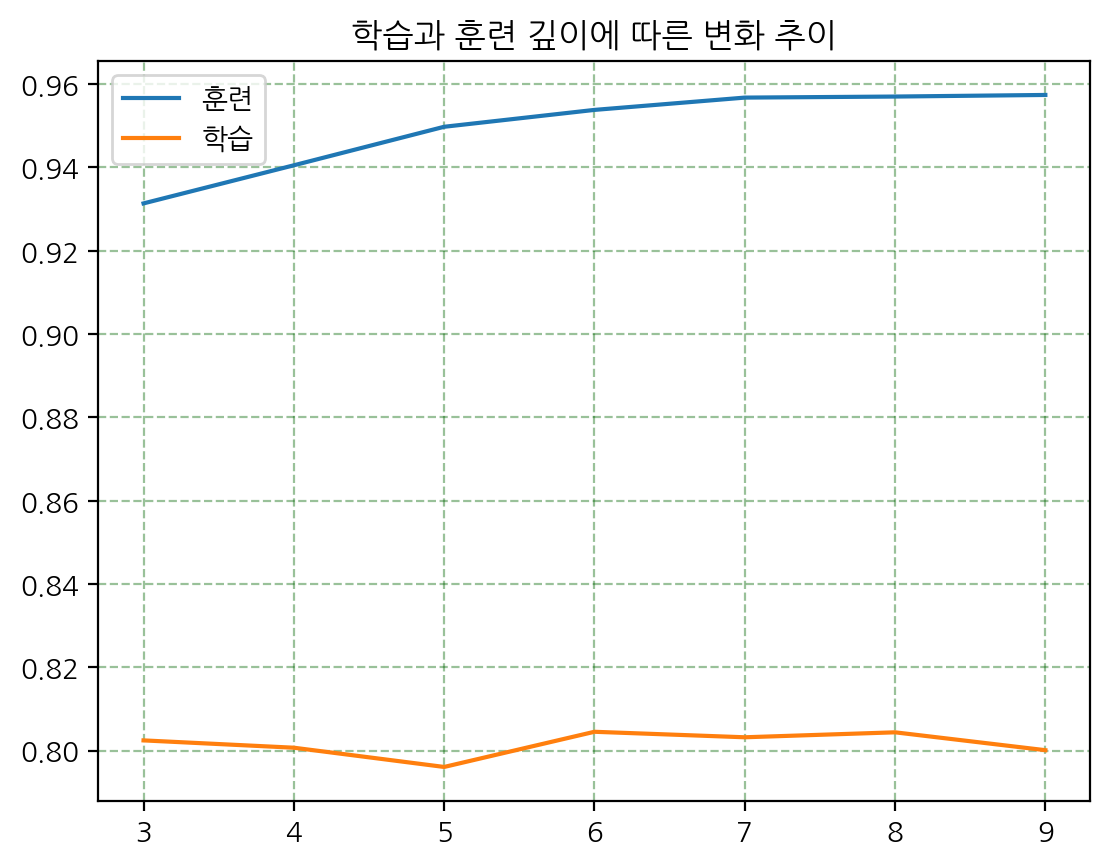

In [221]:
train_score = []
test_score=[]

for i in range(3,10):
    # 모델 생성
    hist = HistGradientBoostingRegressor( max_depth= i)   


    # 성능 평가
    hist.fit(x_train,y_train)
    pred = hist.predict(x_test)
    train_score.append( hist.score(x_train , y_train) )
    test_score.append( hist.score(x_test , y_test) )


plt.title('학습과 훈련 깊이에 따른 변화 추이')
plt.plot(list(range(3,10)), train_score , label = '훈련')
plt.plot(list(range(3,10)), test_score , label = '학습')
plt.grid(color ='darkgreen', linestyle ='--', alpha =0.4)
plt.legend()
plt.show()

- 훈련에 비해 학습 정확도는 상대적으로 낮고 일정하게 유지 -> 과대적합